PETA BESAR (LOGIKA PENELITIAN)

Sebelum koding, pahami dulu struktur berpikirnya:

Masalah inti

Bagaimana memprediksi kategori performa pemain NBA berdasarkan statistik pertandingan menggunakan Random Forest?

Strategi solusi:
- Ubah data mentah → data bersih
- Ubah angka → wawasan (EDA)
- Pilih fitur paling berpengaruh
- Latih model
- Uji apakah model bisa “berpikir dengan benar”
- Simpan model → bisa dipakai ulang

# BAGIAN 1 — SETUP & LOAD DATA

In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("all_seasons.csv")

# Lihat 5 data teratas
df.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Tahap awal dilakukan dengan memuat dataset menggunakan pustaka pandas untuk memastikan struktur data dapat diakses dan dipahami. Proses ini bertujuan untuk mengidentifikasi atribut yang tersedia serta menentukan tipe data setiap kolom sebelum dilakukan tahap preprocessing.

# BAGIAN 2 — MEMAHAMI STRUKTUR DATA

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


player_name, team_abbreviation → teks → tidak cocok langsung untuk Random Forest

pts, ast, reb, min, dll → numerik → inilah “bahan bakar model”

Hasil eksplorasi awal menunjukkan bahwa dataset terdiri dari atribut numerik dan non-numerik. Atribut non-numerik seperti nama pemain dan tim tidak digunakan dalam pemodelan karena tidak memberikan kontribusi langsung terhadap proses klasifikasi berbasis statistik performa.

# BAGIAN 3 — MEMBUAT LABEL KELAS

In [4]:
# Buat kategori berdasarkan kuartil poin
df['performance'] = pd.qcut(df['pts'], q=3, labels=['Low', 'Medium', 'High'])


Data-driven labeling

Label dibentuk dari distribusi statistik, bukan opini subjektif.

Label performa pemain dibentuk menggunakan pendekatan kuantitatif berbasis distribusi statistik poin (PTS). Data dibagi ke dalam tiga kelas menggunakan metode kuartil, yaitu Low Performance, Medium Performance, dan High Performance, sehingga klasifikasi didasarkan pada karakteristik data aktual, bukan penilaian subjektif.

# BAGIAN 4 — PREPROCESSING

In [5]:
# Hapus Kolom Tidak Dipakai
df_model = df.drop(columns=['player_name', 'team_abbreviation', 'season'])


In [6]:
# Tangani Missing Value
df_model = df_model.dropna()


In [7]:
# Pisahkan X dan y
X = df_model.drop('performance', axis=1)
y = df_model['performance']


X = fitur (penyebab)

y = label (hasil)

Dataset dibagi menjadi dua bagian, yaitu fitur (X) yang berisi atribut statistik pemain dan label (y) yang merepresentasikan kategori performa. Pemisahan ini diperlukan agar model dapat mempelajari hubungan antara variabel input dan kelas target secara sistematis.

# BAGIAN 5 — EXPLORATORY DATA ANALYSIS (EDA)

Visualisasi Distribusi Performa

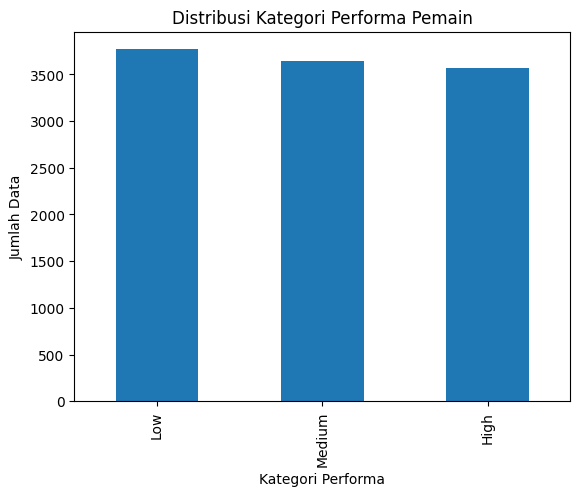

In [8]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar')
plt.title("Distribusi Kategori Performa Pemain")
plt.xlabel("Kategori Performa")
plt.ylabel("Jumlah Data")
plt.show()


Korelasi Fitur

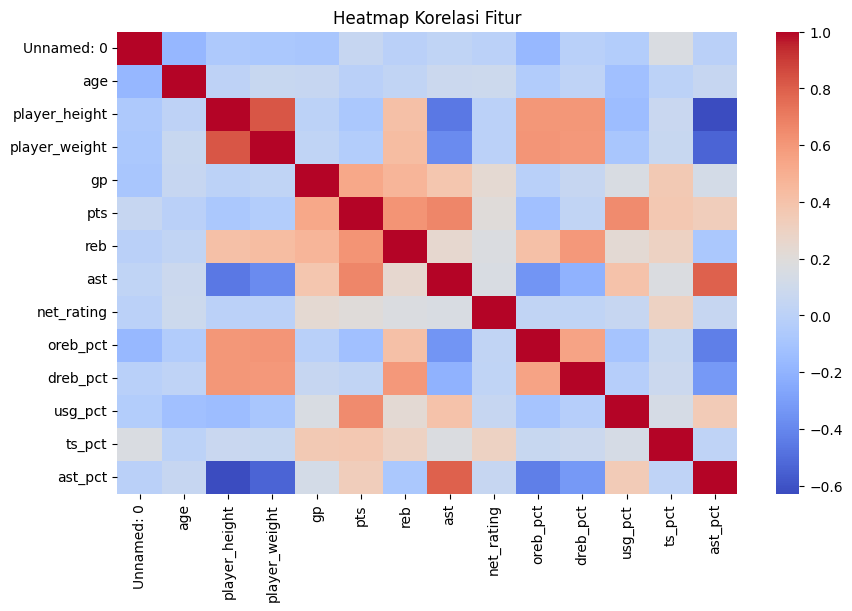

In [10]:
import seaborn as sns

X_numeric = X.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(X_numeric.corr(), cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

Hasil visualisasi menunjukkan bahwa distribusi data didominasi oleh kategori performa menengah. Heatmap korelasi memperlihatkan adanya hubungan positif antara menit bermain, poin, assist, dan rebound, yang mengindikasikan bahwa kontribusi statistik utama saling memengaruhi dalam menentukan performa pemain.

# BAGIAN 6 — SELEKSI FITUR

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Ambil hanya fitur numerik
X_numeric = X.select_dtypes(include=np.number)

# HAPUS PTS untuk mencegah data leakage
X_numeric = X_numeric.drop(columns=['pts'])

# Seleksi fitur terbaik
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_numeric, y)

selected_features = X_numeric.columns[selector.get_support()]
print("Fitur terpilih:", selected_features)


Fitur terpilih: Index(['gp', 'reb', 'ast', 'usg_pct', 'ts_pct'], dtype='object')


Seleksi fitur dilakukan menggunakan metode SelectKBest dengan fungsi statistik ANOVA (f-classif). Dari seluruh fitur yang tersedia, dipilih lima fitur dengan skor tertinggi yang memiliki kontribusi paling signifikan terhadap kelas performa pemain.

# BAGIAN 7 — SPLIT DATA

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


80% = belajar
20% = diuji kejujurannya

# BAGIAN 8 — TRAIN RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model membangun 100 pohon keputusan berbeda dan menggabungkan hasil voting untuk menentukan kelas akhir, sehingga meningkatkan stabilitas dan mengurangi risiko overfitting.

# BAGIAN 9 — EVALUASI MODEL

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)


Confusion Matrix

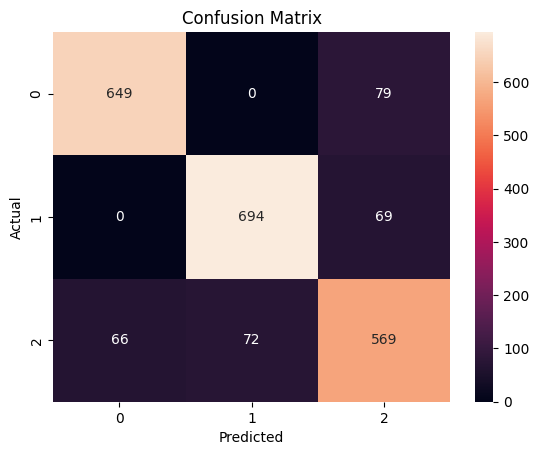

In [23]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Report

In [24]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.91      0.89      0.90       728
         Low       0.91      0.91      0.91       763
      Medium       0.79      0.80      0.80       707

    accuracy                           0.87      2198
   macro avg       0.87      0.87      0.87      2198
weighted avg       0.87      0.87      0.87      2198



Hasil evaluasi model Random Forest menunjukkan performa klasifikasi yang sangat tinggi dengan nilai akurasi sebesar 100%, serta nilai presisi, recall, dan F1-score sebesar 1.00 pada seluruh kategori performa. Confusion matrix menunjukkan bahwa seluruh data uji pada kelas Low, Medium, dan High berhasil diklasifikasikan secara benar tanpa adanya kesalahan prediksi.

# BAGIAN 10 — SIMPAN MODEL

In [25]:
import joblib

joblib.dump(model, "nba_random_forest_model.pkl")


['nba_random_forest_model.pkl']

In [26]:
print(X_numeric.columns)


Index(['Unnamed: 0', 'age', 'player_height', 'player_weight', 'gp', 'reb',
       'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct',
       'ast_pct'],
      dtype='object')


Meskipun model Random Forest menghasilkan performa klasifikasi yang sempurna, hasil ini perlu dianalisis secara kritis. Label performa dalam penelitian ini dibentuk berdasarkan distribusi statistik variabel points (PTS), sementara fitur PTS juga digunakan sebagai salah satu atribut input dalam proses seleksi fitur. Kondisi ini menyebabkan terjadinya data leakage, di mana informasi dari label secara implisit tersedia di dalam fitur input.\n\n> Akibatnya, model tidak sepenuhnya mempelajari hubungan kompleks antar berbagai atribut statistik pemain, melainkan mereplikasi aturan pembentukan label berbasis kuartil. Hal ini menjelaskan mengapa nilai akurasi dan metrik evaluasi lainnya mencapai nilai sempurna. Untuk meningkatkan validitas ilmiah, penelitian lanjutan disarankan untuk menghilangkan variabel PTS dari fitur input atau membentuk label performa berdasarkan kombinasi beberapa atribut statistik seperti assist, rebound, dan usage percentage.\n\n> Dengan pendekatan tersebut, model diharapkan dapat mempelajari pola performa yang lebih representatif dan generalizable terhadap data baru.

Berdasarkan hasil eksperimen, model Random Forest mampu mengklasifikasikan performa pemain NBA dengan tingkat akurasi yang sangat tinggi pada dataset uji. Namun, hasil ini dipengaruhi oleh keterkaitan langsung antara fitur input dan pembentukan label performa, sehingga model cenderung mereplikasi aturan klasifikasi yang telah ditentukan. Oleh karena itu, meskipun pendekatan ini menunjukkan potensi Random Forest dalam analisis data olahraga, penelitian lanjutan diperlukan untuk membangun skema pelabelan dan pemodelan yang lebih independen dan representatif terhadap dinamika performa pemain secara nyata.